# Quantum Algorithms using Qiskit

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *

## The Hadamard operation on multiple qubits
### Creating Equal Superpositions
The $n$-qubit $|0_n\rangle$ state denotes a state where all qubits are in the $|0\rangle$ state. It is sometimes also written as $|0^{\otimes n}\rangle$. We've seen that the Hadamard transformation can create equal superposition states starting from the $|0\rangle$ state. 
$$H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle +|1\rangle)$$
Similarly, the transformation $H\otimes H \equiv H^{\otimes 2}$ can create a uniform superposition of all two-qubit basis states starting from the $|00\rangle$ state.
$$(H \otimes H) |00\rangle = \frac{1}{\sqrt{2}} (|0\rangle +|1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle +|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)= \frac{1}{2}(|0\rangle+|1\rangle+|2\rangle+|3\rangle)$$
Thus, for the case of $n$ qubits, the operation $H^{\otimes n}$ creates a uniform superposition of all $n$-qubit basis states starting from the $|0^{\otimes n}\rangle$ state.
$$H^{\otimes n}|0^{\otimes n}\rangle = \frac{1}{2^{n/2}}\sum\limits_{i=0}^{n-1} |i\rangle$$
### Self-inversion of the Hadamard Transformation
We already know that the $H$ gate is self-adjoint, which also means it is it's own inverse. It is easy to see that the Hadamard transformation on $n$ qubits also has the same property. For two qubits, 
$$ |00\rangle \xrightarrow{(H \otimes H)} \frac{1}{2}(|0\rangle+|1\rangle+|2\rangle+|3\rangle) \xrightarrow{(H \otimes H)} |00\rangle $$
In general, 
$$ |0^{\otimes n}\rangle \xrightarrow{H^{\otimes n}} \frac{1}{2^{n/2}}\sum\limits_{i=0}^{n-1} |i\rangle \xrightarrow{H^{\otimes n}} |0^{\otimes n}\rangle $$
This is true for not only the $|00\rangle$ state, but all states. For example, consider the two qubit state $|01\rangle$
$$ |01\rangle \xrightarrow{(H \otimes H)} \frac{1}{2}(|00\rangle-|01\rangle+|10\rangle-|11\rangle) \xrightarrow{(H \otimes H)} |01\rangle $$

The general effect of the Hadamard transformation on a general state $|x\rangle$ is given as

$$H^{\otimes n}|x\rangle = \frac{1}{2^{n/2}}\sum\limits_{y=0}^{n-1}(-1)^{x\cdot y}|y\rangle$$
where $x\cdot y = x_0\cdot y_0 \oplus y = x_1\cdot y_1 \oplus \cdots \oplus x_{n-1}\cdot y_{n-1}$

So, the Hadamard transformation will take ONLY the uniform superpostion with no relative phases to the $|0^{\otimes n}\rangle$ state.

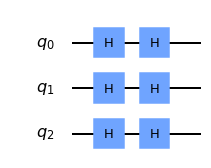

In [2]:
qc4 = QuantumCircuit(3)
# State Preparation
qc4.h(range(3))
# qc4.z(0)
qc4.h(range(3))
qc4.draw(output='mpl')

<BarContainer object of 8 artists>

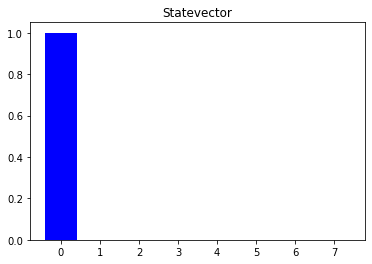

In [3]:
job4 = execute(qc4.reverse_bits(), backend=StatevectorSimulator())
sv = job4.result().get_statevector()
mods = np.absolute(sv)
phases = np.angle(sv)
colors = cm.brg(phases/(2*np.pi))
plt.title('Statevector')
plt.bar(range(8), mods, color=colors)

## Oracles 
The action of a bit oracle is  $|x\rangle|0\rangle \xrightarrow{U_f} |x\rangle|f(x)\rangle$.

The action of a phase oracle is  $|x\rangle|-\rangle \xrightarrow{U_f} (-1)^{f(x)}|x\rangle|-\rangle$.

### 1-bit Boolean function Oracles
Below are the truth tables for all four 1-bit Boolean functions. 

| x 	| $f_0$ 	| $f_1$ 	| $f_2$ 	| $f_3$ 	|
|---	|----------	|----------	|----------	|----------	|
| 0 	| 0        	| 0        	| 1        	| 1        	|
| 1 	| 0        	| 1        	| 0        	| 1        	|


We will now make bit-oracles for each of these

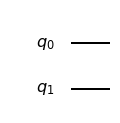

In [4]:
f0_oracle = QuantumCircuit(2)
f0_oracle.draw(output='mpl')

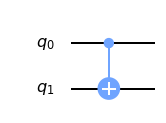

In [5]:
f1_oracle = QuantumCircuit(2)
f1_oracle.cx(0,1)
f1_oracle.draw(output='mpl')

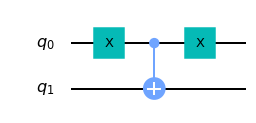

In [6]:
f2_oracle = QuantumCircuit(2)
f2_oracle.x(0)
f2_oracle.cx(0,1)
f2_oracle.x(0)
f2_oracle.draw(output='mpl')

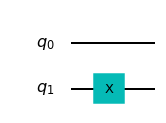

In [7]:
f3_oracle = QuantumCircuit(2)
f3_oracle.x(1)
f3_oracle.draw(output='mpl')

# Deutsch Algorithm
The action of a bit oracle is  $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes |0\rangle \xrightarrow{U_f} \frac{1}{\sqrt{2}}(|0\rangle|f(0)\rangle + |1\rangle|f(1)\rangle) $.

The action of a phase oracle is  $\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes |-\rangle \xrightarrow{U_f} \frac{1}{\sqrt{2}}((-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle)\otimes |-\rangle $.

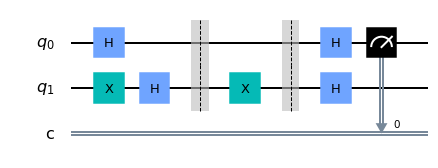

In [8]:
qc_dj = QuantumCircuit(2,1) # (num_qubits, num_bits)
# last qubit in state |1>
qc_dj.x(1)
# Hadamard everything before
qc_dj.h(range(2))
qc_dj.barrier()
# Extend the citcuit with the oracle here
qc_dj.extend(f3_oracle)
qc_dj.barrier()
# Hadamard everything after
qc_dj.h(range(2))
# Measure all but the last qubit
qc_dj.measure(0,0)
qc_dj.draw(output='mpl')

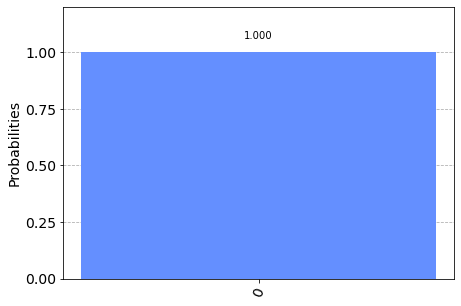

In [9]:
job_dj = execute(qc_dj.reverse_bits(), backend=QasmSimulator(), shots=1024)
plot_histogram(job_dj.result().get_counts())

# Deutsch-Jozsa Algorithm
This is the multi-qubit generalisation of the Deutsch algorithm. The procedure is exactly the same as the Deutsch algorithm. 

$$\left(\frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1} |x\rangle \right) \otimes |-\rangle \xrightarrow{U_f}\left(\frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1} (-1)^{f(x)}|x\rangle \right) \otimes |-\rangle $$

The important underlying idea is that only the constant function imparts equal phase shifts to all the basis state componenents and hence the final Hadamard transformation will result in the $|0^{\otimes n}\rangle$
## Two-bit Boolean function oracles
Let us construct oracles for one constant function $f_c$ and one balanced function $f_b$. 

| $x_1$ 	| $x_0$ 	| $f_c$ 	| $f_b$ 	|
|-------	|-------	|-------	|-------	|
| 0     	| 0     	| 0     	| 0     	|
| 0     	| 1     	| 0     	| 1     	|
| 1     	| 0     	| 0     	| 0     	|
| 1     	| 1     	| 0     	| 1     	|

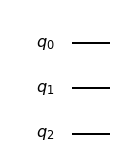

In [10]:
fc_oracle = QuantumCircuit(3)
fc_oracle.draw(output='mpl')

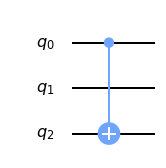

In [11]:
fb_oracle = QuantumCircuit(3)
fb_oracle.cx(0,2)
fb_oracle.draw(output='mpl')

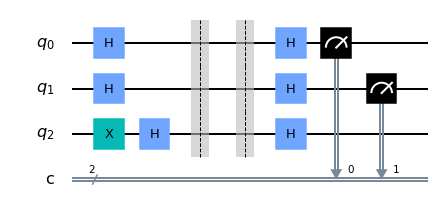

In [12]:
qc_dj = QuantumCircuit(3,2) # (num_qubits, num_bits)
# last qubit in state |1>
qc_dj.x(2)
# Hadamard everything before
qc_dj.h(range(3))
qc_dj.barrier()
# Extend the citcuit with the oracle here
qc_dj.extend(fc_oracle)
qc_dj.barrier()
# Hadamard everything after
qc_dj.h(range(3))
# Measure all but the last qubit
qc_dj.measure([0,1],[0,1])
qc_dj.draw(output='mpl')

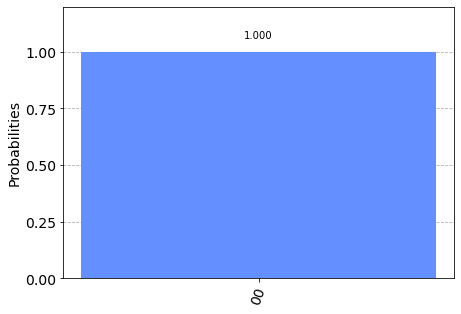

In [13]:
job_dj = execute(qc_dj.reverse_bits(), backend=QasmSimulator(), shots=1024)
plot_histogram(job_dj.result().get_counts())